In [106]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
import pandas as pd
import numpy as np
from tensorflow.keras.utils import to_categorical

In [107]:
from tensorflow.keras.datasets import mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [108]:
x_train.shape,y_train.shape # 60000 greyscale images of dimensions 28x28

((60000, 28, 28), (60000,))

In [109]:
x_test.shape,y_test.shape

((10000, 28, 28), (10000,))

In [ ]:
# normalizing the data is not required for small datasets
# we can use minmax scaler if we want to normalize the data in the range (0,1) for faster convergence to prevent stuck in local minima

In [110]:
# determining number of classes
ul=np.unique(y_train)
ul # 10 labels

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

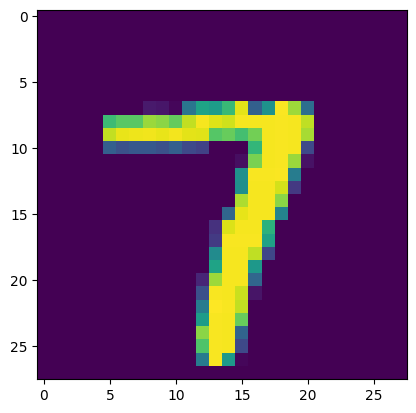

In [111]:
import matplotlib.pyplot as plt
i=np.random.randint(0,x_train.shape[0]) # i ranges from 0 to 59999
plt.imshow(x_train[i]) # demonstrating the images with each of the size 28x28 pixels 

In [112]:
y_train=to_categorical(y_train) # one hot encoding 
y_test=to_categorical(y_test)

In [120]:
# creating a basic cnn model for multiclass classification  
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',padding='same',input_shape=(28,28,1))) # channel is 1 for greyscale image 
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

C:\Users\vivek\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# lower dropout rate is preferred for cnn models to preserve edges 

In [121]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')
# you can change or configure the optimizer using keras.optimizers and also can change learning rate

In [122]:
history=model.fit(x_train,y_train,epochs=10,batch_size=64,validation_data=(x_test,y_test))
# you can also use validation_data for evaluating data during training process to prevent overfitting in advance 

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 17s 15ms/step - accuracy: 0.1296 - loss: 3.5774 - val_accuracy: 0.3030 - val_loss: 1.7258
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.2165 - loss: 2.0030 - val_accuracy: 0.4493 - val_loss: 1.5336
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.3074 - loss: 1.7736 - val_accuracy: 0.6363 - val_loss: 1.0664
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.4183 - loss: 1.5034 - val_accuracy: 0.7660 - val_loss: 0.7454
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.5608 - loss: 1.1441 - val_accuracy: 0.9602 - val_loss: 0.2188
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.7343 - loss: 0.7561 - val_accuracy: 0.9686 - val_loss: 0.1503
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.8253 - loss: 0.5504 - val_accuracy: 0.9749 - val_loss: 0.1113
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.8599 - loss: 0.4517 - 

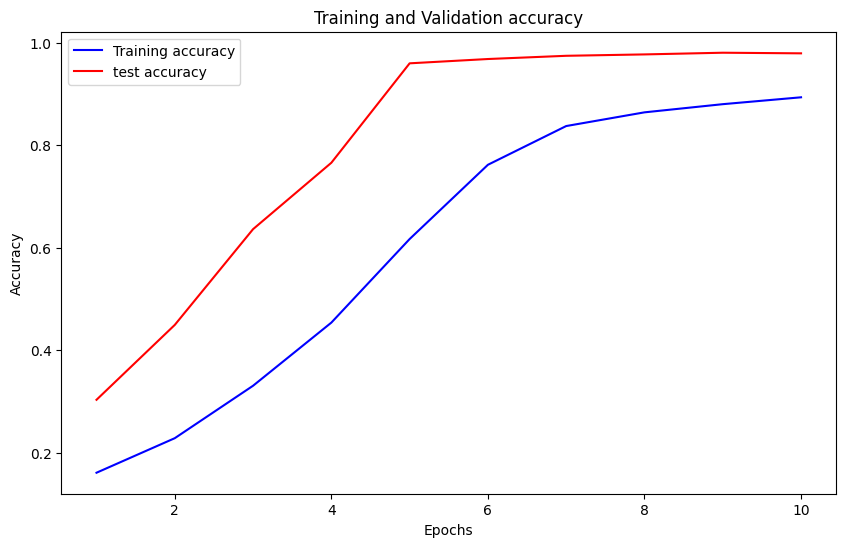

In [123]:
# Retrieve accuracy from history
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(train_acc) + 1)

# Plot the accuracy
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='test accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [124]:
# as you observe the above graph, the both train accuracy and test accuracy is increasing constantly and becomes constant after 5 epochs
# model learns noise from train data up to extent where it negatively impact test data, i.e called overfitting
# early stopping, or regularization techniques can be used to prevent overfitting
# if test accurayc is low and train accuracy is high then it is called underfitting 

In [127]:
# optimal epochs are 2
history=model.fit(x_train,y_train,epochs=6,batch_size=64)

Epoch 1/6
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - accuracy: 0.9153 - loss: 0.2805
Epoch 2/6
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.9223 - loss: 0.2515
Epoch 3/6
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.9280 - loss: 0.2323
Epoch 4/6
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.9342 - loss: 0.2154
Epoch 5/6
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.9388 - loss: 0.2042
Epoch 6/6
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.9386 - loss: 0.2085


In [128]:
model.evaluate(x_test,y_test)[1]*100 # correct accuracy of the model

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9850 - loss: 0.0481


98.72999787330627

In [ ]:
# before adding regularization (dropout) the accuracy is 97.5, after adding, the accuracy is increased to 98.72